# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El proposito del proyecto es analizar datos de 500 clientes para determinar que tarifa de las dos disponibles (Surf y Ultimate) genran mas ingreso.

Se iniciara preparando y limpiando los datos para proceder al analisis y terminar con las pruebas estadisticas.

## Inicialización

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st  
import seaborn as sns
# Cargar todas las librerías


## Cargar datos

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv') 
plans =  pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
# Carga los archivos de datos en diferentes DataFrames

## Preparar los datos

Se analizara la informacion, para proceder a corregir nombres de columnas, analizar si se requiere cambiar el tipo de datos para ciertas columnas, buscar duplicados y enricquecer datos conforme se necesite.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head() 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Este DataFrame cuenta con 8 columnas y solo dos entradas. Las dos lineas es la informacion de cada plan. El Dtype de la mayoria de las colunmas es enteros. Hay dos columnas de float para describir los precios en centavos en cargos extras si se exceden los limites de cada paquete. No hay valores ausentes. 
Se observa que en la descripcion de los datos, la columna del monto por plan esta descrita como usd_monthly_fee. Se cambiara el nombre para mantener uniformidad.

## Corregir datos

In [5]:
plans = plans.rename(columns={'usd_monthly_pay' : 'usd_monthly_fee'})
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

## Enriquecer los datos

En la informacion se especifica que se  redondean los megabytes a gigabytes, pero mb_per_month viene solo en megabytes, se creeara una columna donde se convierta a GB.

In [6]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans.info()
plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
users.head()
# Imprime una muestra de datos para usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN




*El DataFrame tiene 8 columas y 500 entradas. 
*user_id y age estan representadas como int64 lo cual es correcto.
*first_name, last_name, city, reg_date, plan, and churn_date estan representadas como object data types. Sin embargo, reg_date and churn_date estarian mejor como tipo de datos datetime, ya que guardan informacion sobre fechas.
*La columna churn_date es la unica que presenta valores ausentes (solo tiene 34 entradas no nulas), lo cual podria ser esperado, ya que no todos los usuarios habrian de dejar el servicio para cuando se genero la informacion.
*Las columas reg_date y churn-data estan guardadas con el formato string de datos, es conveniente convertirlos a datetime
*Se revisaran duplicados

### Corregir los datos

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [10]:
users.duplicated().sum() #revisar si hay duplicados en Df de usuarios

0

In [11]:
users['user_id'].duplicated().sum() #revision de duplicados de ID's

0

In [12]:
users['plan'].unique() #verificando que no haya variaciones en los dos planes disponibles a los usuarios

array(['ultimate', 'surf'], dtype=object)

In [13]:
sorted(users['city'].unique()) #verificando que no haya variaciones de escritura en ciudades

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Cape Coral-Fort Myers, FL MSA',
 'Charleston-North Charleston, SC MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jackson

### Enriquecer los datos

In [14]:
users['month'] = users['reg_date'].dt.month #extraccion de mes de la columna reg_date
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


In [15]:
users['year'] = users['reg_date'].dt.year 
users.year.unique()

array([2018])

## Llamadas

In [16]:
calls.info()
# Imprime la información general/resumida sobre el DataFrame de las llamadas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
calls.head() #Imprime una muestra de datos para las llamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


*La tabla calls tiene 137735 entradas con 4 columnas. No contiene valores nulos.
*La columna call_date es ub objeto(string). Se tiene que convertir a datetime.

### Corregir los datos

In [18]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [19]:
calls.duplicated().sum() #revision de duplicados

0

In [20]:
calls['id'].duplicated().sum() #revision de duplicados de ID's de llamadas

0

### Enriquecer los datos###


La descripcion de los datos estipula que Megaline redondea los segundos a minutos. Se redondearan los datos en la columna duration usando el metodo .ceil. Tambien se creera una columna para mes. De call_date se extraera el mes para crear otra la columna 'month'

In [21]:
calls['rounded_up_duration'] = np.ceil(calls['duration']) #redondeo de duracion de llamadas
calls.head()

,id,user_id,call_date,duration,rounded_up_duration
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


In [22]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,user_id,call_date,duration,rounded_up_duration,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


In [23]:
calls['year'] = calls['call_date'].dt.year
calls.year.unique()

array([2018])

## Mensajes

In [24]:
messages.info()# Imprime la información general/resumida sobre el DataFrame de los mensajes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



*El DataFrame tiene 76051 entradas y 3 columnas. No contiene valores ausentes. 
*La columna message_date tiene un datatype de String. Es conveniente convertirla a datetime.
*Se revisara si hay duplicados en el DataFrame y ID's de mensajes

### Corregir los datos

In [26]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d') #conversion a datetime
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [27]:
messages.duplicated().sum()

0

In [28]:
messages['id'].duplicated().sum()

0

### Enriquecer los datos

De message_date se extraera el mes para crear  la columna 'month'

In [29]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [30]:
internet.info()# Imprime la información general/resumida sobre el DataFrame de internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
internet.head() #Imprime una muestra de datos para el tráfico de internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



*El DataFrame tiene 104825 entradas y 4 columnas. No contiene valores ausentes.
*La columna session_date que es de tipo string se tiene que convertir a datetime.
*Por precaucion se revisaran duplicados

### Corregir los datos

In [32]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [33]:
messages.duplicated().sum() #revision de duplicados en DataFrame

0

In [34]:
messages['id'].duplicated().sum() #revision de duplicados de ID's de mensajes.

0

### Enriquecer los datos


Para poder visualizar la columna mb_used en gigabytes redondeados, se creara la columna mg_used y se agregara una columna para mes.

In [35]:
internet['gb_used'] = internet['mb_used'] / 1024 #conversion a GB
internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


In [36]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12


## Estudiar las condiciones de las tarifas

In [37]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


In [38]:

# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_pivot = (
    calls
    .groupby(["user_id", "month"])
    .agg(
        rounded_minutes_used = ("rounded_up_duration","sum"),
        calls_made = ("rounded_up_duration","count")
    )
    .reset_index()
)
calls_pivot

,user_id,month,rounded_minutes_used,calls_made
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53
2256,1499,11,308.0,45


In [39]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.


messages_pivot = (
        messages
        .groupby(['user_id', 'month'])[['id']].count()
        .rename(columns = {'id':"number_of_texts"})
        .reset_index()
)

    
messages_pivot

,user_id,month,number_of_texts
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [40]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_pivot = (
        internet
        .groupby(['user_id', 'month'])[['gb_used']].sum()
        .rename(columns= {'gb_used' :'volume_of_data_used'})
        .assign(volume_of_data_used = lambda x : np.ceil(x["volume_of_data_used"]))
        .reset_index()
)

internet_pivot

,user_id,month,volume_of_data_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [41]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

calls_and_messages = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
info_usage_table = calls_and_messages.merge(internet_pivot, on=['user_id', 'month'], how='outer')

info_usage_table

,user_id,month,rounded_minutes_used,calls_made,number_of_texts,volume_of_data_used
0,1000,12,124.0,16.0,11.0,2.0
1,1001,8,182.0,27.0,30.0,7.0
2,1001,9,315.0,49.0,44.0,14.0
3,1001,10,393.0,65.0,53.0,22.0
4,1001,11,426.0,64.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0


In [42]:
user_table_info = users.merge(plans, left_on ='plan', right_on = 'plan_name')
user_table_info.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,year,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,2018,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,2018,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,8,2018,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaT,1,2018,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaT,12,2018,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [43]:
usage_table = info_usage_table.merge(user_table_info, on='user_id')
usage_table
usage_table.columns #comprobar columnas en tabla


Index(['user_id', 'month_x', 'rounded_minutes_used', 'calls_made',
       'number_of_texts', 'volume_of_data_used', 'first_name', 'last_name',
       'age', 'city', 'reg_date', 'plan', 'churn_date', 'month_y', 'year',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'gb_per_month_included'],
      dtype='object')

In [44]:
columns_to_drop = ['month_y', 'first_name', 'last_name', 'age']
usage_table = usage_table.drop(columns=columns_to_drop)

In [45]:
# Eliminar columnas, renombrar meses

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
usage_table['month_x'] = usage_table['month_x'].map(month_map)

In [46]:
# Calcula el ingreso mensual para cada usuario
extra_calls = usage_table["rounded_minutes_used"] - usage_table["minutes_included"]
extra_calls = extra_calls.fillna(0)

extra_calls = [0 if x<0 else x for x in extra_calls]
extra_calls = pd.Series(extra_calls)
usage_table["extra_calls"] = extra_calls * usage_table["usd_per_minute"]
usage_table.query('extra_calls>0')


extra_messages = usage_table["number_of_texts"] - usage_table["messages_included"]
extra_messages = extra_messages.fillna(0)

extra_messages = [0 if x<0 else x for x in extra_messages]
extra_messages = pd.Series(extra_messages)
usage_table["extra_messages"] = extra_messages * usage_table["usd_per_message"]
usage_table.query('extra_messages>0')

extra_data = usage_table['volume_of_data_used'] - usage_table['gb_per_month_included']
extra_data = extra_data.fillna(0)

extra_data = [0 if x<0 else x for x in extra_data]
extra_data = pd.Series(extra_data)
usage_table['extra_data'] = extra_data * usage_table["usd_per_gb"]
usage_table.query('extra_data>0')



,user_id,month_x,rounded_minutes_used,calls_made,number_of_texts,volume_of_data_used,city,reg_date,plan,churn_date,...,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_calls,extra_messages,extra_data
3,1001,Oct,393.0,65.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.00,0.09,70.0
4,1001,Nov,426.0,64.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.00,0.00,40.0
5,1001,Dec,412.0,56.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.00,0.00,40.0
7,1002,Nov,386.0,55.0,32.0,19.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.00,0.00,40.0
9,1003,Dec,1104.0,149.0,50.0,27.0,"Tulsa, OK MSA",2018-01-28,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,18.12,0.00,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1194,Oct,NaN,NaN,88.0,31.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.00,1.14,160.0
2285,1194,Nov,NaN,NaN,62.0,42.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.00,0.36,270.0
2286,1194,Dec,NaN,NaN,56.0,31.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.00,0.18,160.0
2288,1204,Dec,NaN,NaN,78.0,36.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaT,...,3000,70,7,0.01,0.01,ultimate,30.0,0.00,0.00,42.0


## Estudia el comportamiento de usuario

Se analizaran patrones de consumo de los clientes en llamadas, mensajes y datos. Se usara estadistica descriptiva de los datos previamente fusionados, asi como graficos derivados de esta informacion que nos permitira sacar conclusiones de este snapshot de datos.

### Llamadas

plan,surf,ultimate
month_x,,
Apr,351.540000,336.857143
Aug,417.849057,421.436620
Dec,484.501608,465.261745
Feb,297.000000,470.333333
Jan,203.000000,193.500000
Jul,453.733333,427.067797
Jun,435.791667,387.444444
Mar,330.000000,304.250000
May,410.240000,406.241379


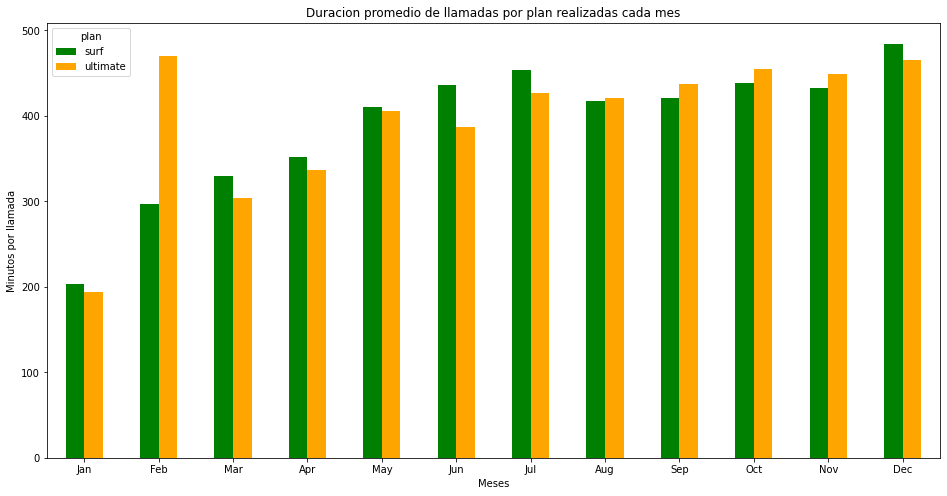

In [47]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mean_call_duration = usage_table.pivot_table(index = 'month_x', columns = 'plan', aggfunc='mean', values='rounded_minutes_used')
display(mean_call_duration)

#ordenar meses cronologicamente
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
usage_table['month_x'] = pd.Categorical(usage_table['month_x'], categories=month_order, ordered=True)
usage_table = usage_table.sort_values('month_x')

#creacion de grafica

mean_call_duration = mean_call_duration.reindex(month_order, axis=0)
mean_call_duration.plot.bar(figsize=(16,8), rot=0, color=['Green', 'Orange'])
plt.title( 'Duracion promedio de llamadas por plan realizadas cada mes')
plt.ylabel('Minutos por llamada')
plt.xlabel('Meses')

plt.show()

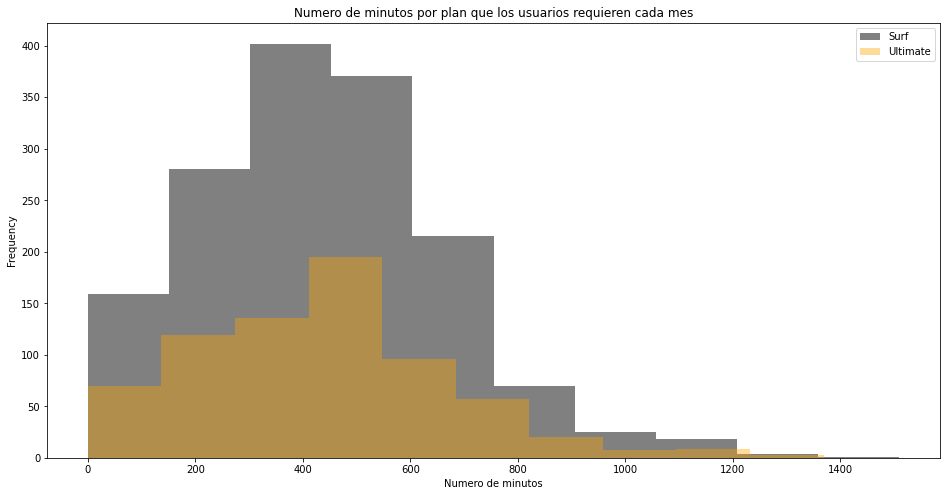

In [48]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_user_min_consuption =  usage_table[usage_table['plan_name'] == 'surf']
ultimate_user_min_consuption =  usage_table[usage_table['plan_name'] == 'ultimate']


surf_user_min_consuption['rounded_minutes_used'].plot.hist(figsize=(16,8), color='Gray')
ultimate_user_min_consuption['rounded_minutes_used'].plot.hist(color='Orange', alpha=0.4)

# Set the plot attributes
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Numero de minutos')
plt.title('Numero de minutos por plan que los usuarios requieren cada mes') 

plt.show()



In [49]:
# Calcula la media y la varianza de la duración mensual de llamadas.

monthly_call_duration_stats = usage_table.groupby('plan')['rounded_minutes_used'].agg(['mean', 'var']).reset_index()
monthly_call_duration_stats.columns = ['plan', 'mean_monthly_call_mins', 'var_monthly_call_mins']
monthly_call_duration_stats

,plan,mean_monthly_call_mins,var_monthly_call_mins
0,surf,436.519741,52571.063243
1,ultimate,434.676017,56573.632247


In [50]:
surf_user_min_consuption['rounded_minutes_used'].describe()

count    1545.000000
mean      436.519741
std       229.283805
min         0.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: rounded_minutes_used, dtype: float64

<AxesSubplot:xlabel='plan', ylabel='rounded_minutes_used'>

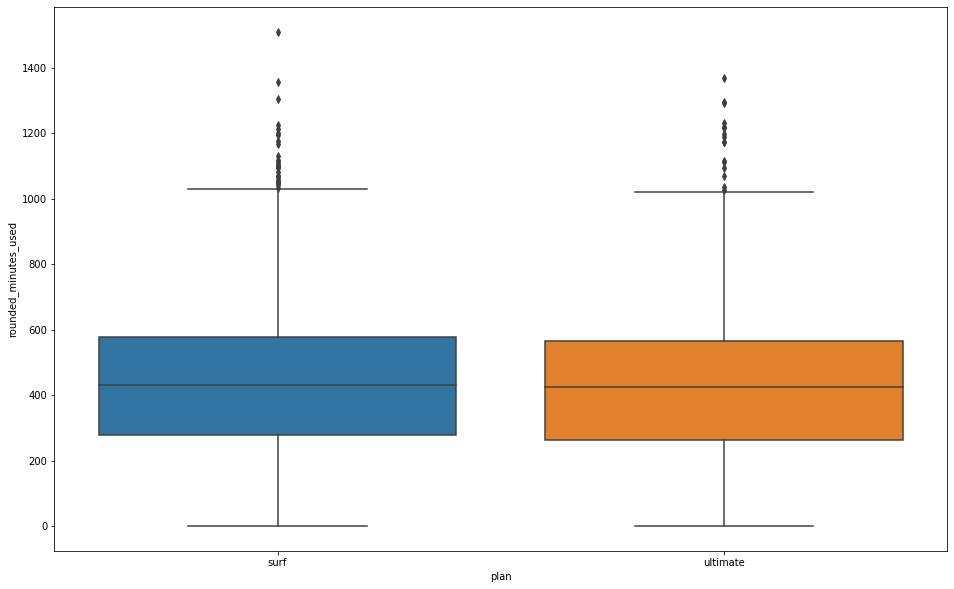

In [51]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='plan', y='rounded_minutes_used', data=usage_table)

In [52]:
ultimate_user_min_consuption['rounded_minutes_used'].describe()


count     713.000000
mean      434.676017
std       237.852123
min         0.000000
25%       263.000000
50%       425.000000
75%       566.000000
max      1369.000000
Name: rounded_minutes_used, dtype: float64

**Conclusiones Llamadas**

En general, parece que los clientes del plan Ultimate tienden a tener duraciones de llamadas promedio más largas que los del plan Surf, 

La diferencia en la duración promedio de las llamadas entre los dos planes varía de un mes a otro; algunos meses tienen una diferencia mayor (febrero) y la menor en mayo.

Ambos planes muestran una tendencia general de aumento de la duración promedio de las llamadas de enero a diciembre, lo que podría indicar un efecto estacional o una tendencia en el comportamiento de los clientes.

El plan Surf parece tener más variación en la duración promedio de las llamadas que el plan Ultimate.

La mayor duración promedio de llamadas para ambos planes se registró en diciembre de 2018.

Estudiando el histograma podemos ver que tanto los usuarios de Surf como de Ultimate tienden a usar entre 250 a 650 minutos mensualmente.

El plan Surf tiene una duración media de llamada mensual ligeramente mayou (436,52 minutos) que el plan de tarifa Ultimate (434,68 minutos).

La distribución de la duración de las llamadas mensuales para los usuarios del plan Surf está sesgada ligeramente a la derecha, con un amplio rango de variación en la duración de las llamadas. La mayoría de los usuarios del plan Surf (50%) realizan llamadas de menos de 430 minutos al mes, mientras que algunos usuarios realizan llamadas muy largas, hasta un máximo de 1510 minutos al mes.

La distribución de la duración de las llamadas mensuales para los usuarios del plan Ultimate está sesgada ligeramente a la derecha, con un amplio rango de variación en la duración de las llamadas. La mayoría de los usuarios del plan Ultimate (50%) realizan llamadas de menos de 425 minutos al mes, mientras que algunos usuarios realizan llamadas muy largas, hasta un máximo de 1369 minutos al mes. La duración media de las llamadas mensuales para los usuarios del plan Ultimate es ligeramente mayor que la de los usuarios del plan Surf, pero no es una diferencia muy significativa.

### Mensajes

In [53]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mean_sent_messages = usage_table.pivot_table(index = 'month_x', columns = 'plan', aggfunc='mean', values='number_of_texts')
display(mean_sent_messages)
mean_sent_messages['surf'] = mean_sent_messages['surf'].round(0)
mean_sent_messages['ultimate'] = mean_sent_messages['ultimate'].round(0)
mean_sent_messages

plan,surf,ultimate
month_x,,
Jan,21.000000,20.666667
Feb,21.600000,25.166667
Mar,21.937500,34.714286
Apr,24.166667,28.937500
May,33.017857,44.333333
Jun,33.616438,36.289474
Jul,35.945055,41.212766
Aug,37.596774,47.929825
Sep,39.523179,45.901408


plan,surf,ultimate
month_x,,
Jan,21.0,21.0
Feb,22.0,25.0
Mar,22.0,35.0
Apr,24.0,29.0
May,33.0,44.0
Jun,34.0,36.0
Jul,36.0,41.0
Aug,38.0,48.0
Sep,40.0,46.0


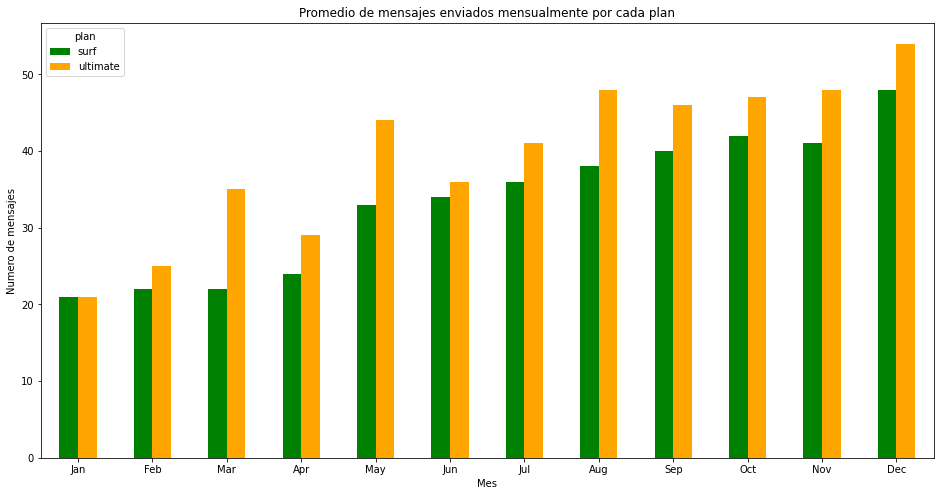

In [54]:
mean_sent_messages.plot.bar(figsize=(16,8), rot=0, color=['Green', 'Orange'])

plt.title('Promedio de mensajes enviados mensualmente por cada plan') 
plt.ylabel('Numero de mensajes')
plt.xlabel('Mes')

plt.show()

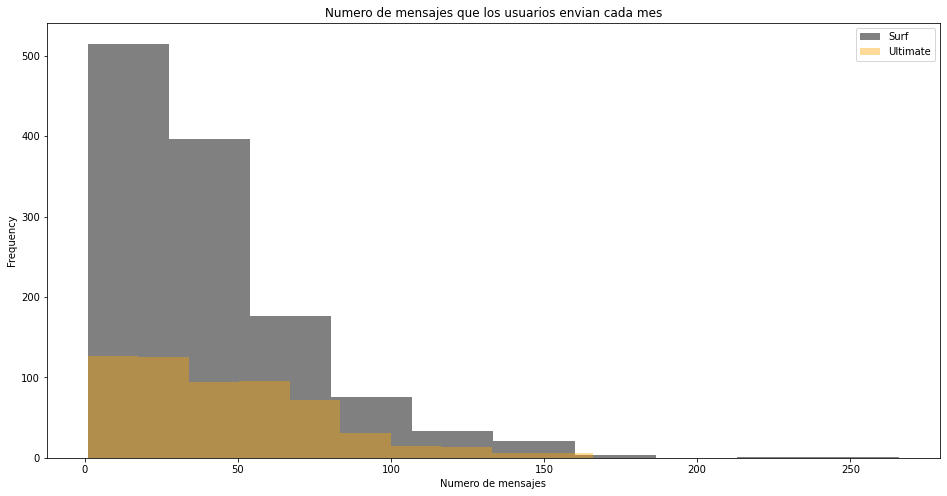

In [55]:
surf_user_me_consuption =  usage_table[usage_table['plan_name'] == 'surf']
ultimate_user_me_consuption =  usage_table[usage_table['plan_name'] == 'ultimate']


surf_user_min_consuption['number_of_texts'].plot.hist(figsize=(16,8), color='Gray')
ultimate_user_min_consuption['number_of_texts'].plot.hist(color='Orange', alpha=0.4)

# Set the plot attributes
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Numero de mensajes')
plt.title('Numero de mensajes que los usuarios envian cada mes')

plt.show()

In [56]:
surf_user_me_consuption['number_of_texts'].describe()

count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: number_of_texts, dtype: float64

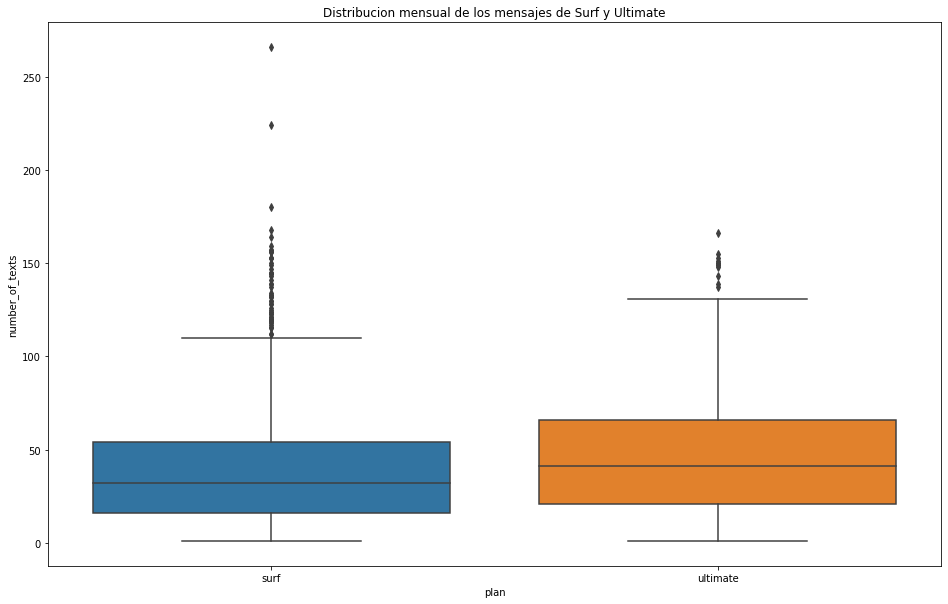

In [57]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='plan', y='number_of_texts', data=usage_table)
plt.title('Distribucion mensual de los mensajes de Surf y Ultimate')

plt.show()

In [58]:
ultimate_user_me_consuption['number_of_texts'].describe()

count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: number_of_texts, dtype: float64

In [59]:
#calcular media y varianza para ver si los dos planes tienen diferente comportamientos en cuanto al envio de mensajes
monthly_messages_stats= usage_table.pivot_table(index= 'plan_name', values = 'number_of_texts',aggfunc=['mean', 'var'])
monthly_messages_stats.columns = ['mean_monthly_messages', 'var_monthly_messages']
monthly_messages_stats

,mean_monthly_messages,var_monthly_messages
plan_name,,
surf,40.109656,1091.344231
ultimate,46.296233,1085.183108


**Conclusiones Mensajes**

En la mayoria de los meses los usuarios del plan Ultimate mandadn mas mensajes que los del plan Surf.

El promedio más alto de mensajes enviados por mes para ambos planes se registró en diciembre de 2018.

El numero de mensajes enviados por los usuarios de ambos planes es relativamente bajo. La mayoria de los meses tienen un promedio de menos de 50 mensajes por mes.

En el histograma podemos ver que  los usuarios de ambos planes no necesitan tantos mensajes por mes. El numero de mensajes enviados por los usuarios del plan Surf es cerca messages de 190, mientras que para los usarios de Ultimate alrededor de 170 mensajes.
La media del número mensual de mensajes es mayor para los usuarios del plan Ultimate (46.30) que para los usuarios del plan Surf(46.11).

La distribución del número mensual de mensajes para los usuarios del plan Surf está sesgada hacia la derecha. La mayoría de los usuarios del plan Surf (50%) enviaron 32 mensajes o menos por mes, mientras que algunos usuarios enviaron hasta 266 mensajes por mes.

La mayoría de los usuarios del plan Ultimate (50%) enviaron 41 mensajes o menos por mes, mientras que algunos usuarios enviaron hasta 166 mensajes por mes. El número medio mensual de mensajes de los usuarios del plan Ultimate es mayor al de los usuarios del plan Surf. Sin embargo, la cantidad máxima mensual de mensajes es menor para los usuarios del plan Ultimate en comparación con los usuarios del plan Surf.


### Internet

In [60]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mean_internet_traffic_consumed = usage_table.pivot_table(index='month_x', columns='plan_name', aggfunc='mean', values='volume_of_data_used')
mean_internet_traffic_consumed

plan_name,surf,ultimate
month_x,,
Jan,5.000000,7.250000
Feb,12.222222,17.285714
Mar,13.565217,18.416667
Apr,12.469388,16.333333
May,14.302632,16.862069
Jun,15.810526,15.425532
Jul,17.016667,16.491525
Aug,17.201258,17.845070
Sep,16.777202,17.011628


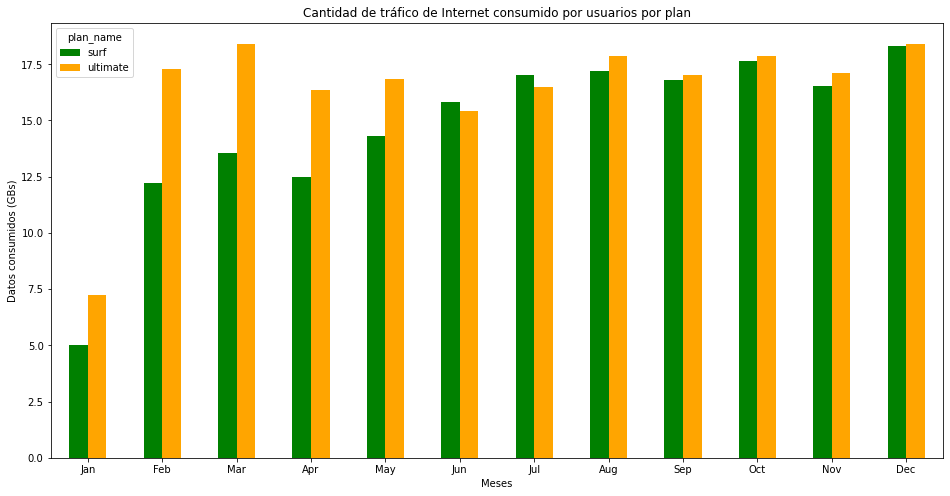

In [61]:
mean_internet_traffic_consumed.plot.bar(figsize=(16,8), rot =0, color=['Green', 'Orange'])

plt.title('Cantidad de tráfico de Internet consumido por usuarios por plan')

plt.ylabel('Datos consumidos (GBs)')
plt.xlabel('Meses')

plt.show()

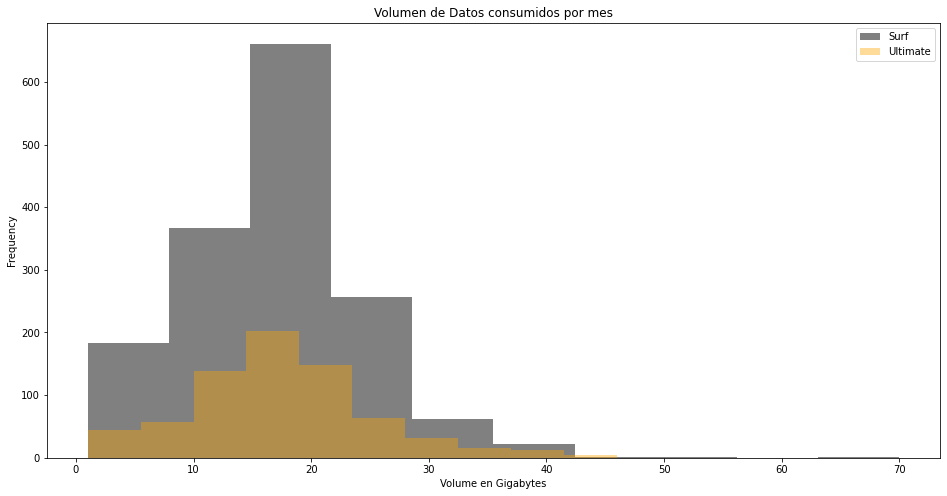

In [62]:
surf_user_int_consuption =  usage_table[usage_table['plan_name'] == 'surf']
ultimate_user_int_consuption =  usage_table[usage_table['plan_name'] == 'ultimate']


surf_user_int_consuption['volume_of_data_used'].plot.hist(figsize=(16,8), color='Gray')
ultimate_user_int_consuption['volume_of_data_used'].plot.hist(color='Orange', alpha=0.4)


plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Volume en Gigabytes')
plt.title('Volumen de Datos consumidos por mes')

plt.show()

In [63]:
monthly_data_stats = usage_table.pivot_table(index='plan_name', values='volume_of_data_used', aggfunc=['mean', 'var'])
monthly_data_stats.columns = ['mean_monthly_internet_GBs', 'var_monthly_internet_GBs']
monthly_data_stats

,mean_monthly_internet_GBs,var_monthly_internet_GBs
plan_name,,
surf,16.831194,59.473734
ultimate,17.331015,58.494733


In [64]:
surf_user_int_consuption['volume_of_data_used'].describe()

count    1558.000000
mean       16.831194
std         7.711922
min         1.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: volume_of_data_used, dtype: float64

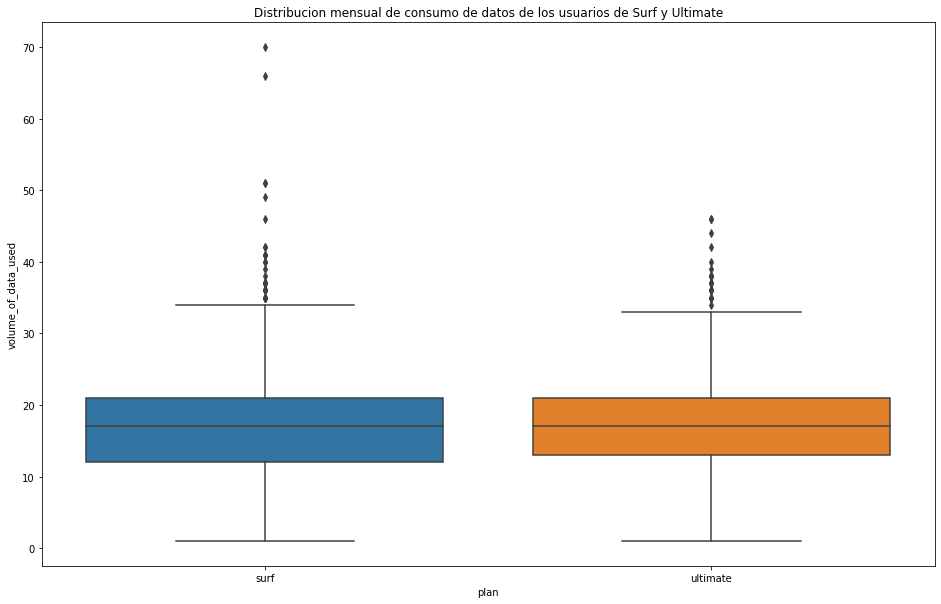

In [65]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='plan', y='volume_of_data_used', data=usage_table)
plt.title('Distribucion mensual de consumo de datos de los usuarios de Surf y Ultimate')


plt.show()

In [66]:
surf_user_int_consuption['volume_of_data_used'].describe()

count    1558.000000
mean       16.831194
std         7.711922
min         1.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: volume_of_data_used, dtype: float64


**Conclusiones Internet**

*Los dos planes muestran un patron similar de uso durante el 2018. Diciembre fue el mes de mas consumo de datos para ambos planes y menor consumo durante los primeros meses del 2018.

*La mayoría de los usuarios de ambos planes utilizan entre 15 y 22 GB de Internet mensualmente.El número máximo de GB de Internet que necesitan los usuarios del plan Surf es alrededor de 42. La cantidad máxima de GB de Internet que necesitan los usuarios del plan Ultimate es cercana a 46.

*El uso de datos mensual para os dos planes es relativamente similar: los usuarios de Surf consumen una media de 16.83 GB y los usuarios de Ultimate consumen una media de 17.33 GB

*La media y la varianza indican que que los usuarios de ambos planes consumen cantidades similares de tráfico de Internet en promedio, con relativamente poca variación entre los usuarios dentro de cada plan.


## Ingreso

In [67]:
usage_table.head()

,user_id,month_x,rounded_minutes_used,calls_made,number_of_texts,volume_of_data_used,city,reg_date,plan,churn_date,...,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_calls,extra_messages,extra_data
156,1042,Jan,114.0,18.0,NaN,2.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaT,...,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0
862,1185,Jan,181.0,23.0,NaN,7.0,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaT,...,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0
361,1077,Jan,290.0,42.0,37.0,11.0,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaT,...,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0
914,1196,Jan,287.0,42.0,23.0,9.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,NaT,...,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0
992,1214,Jan,16.0,5.0,2.0,2.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaT,...,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0


In [68]:
usage_table['monthly_revenue'] = (
    usage_table['usd_monthly_fee'] +
    usage_table['extra_calls'] +
    usage_table['extra_messages'] +
    usage_table['extra_data']
)
mr_pivot_table = pd.pivot_table(
    usage_table,
    values='monthly_revenue',
    index=['usd_monthly_fee', 'extra_calls', 'extra_messages', 'extra_data'],
).reset_index()


In [69]:
usage_table = pd.merge(usage_table, mr_pivot_table, on=['usd_monthly_fee', 'extra_calls', 'extra_messages', 'extra_data'], how='left')
usage_table = usage_table.drop(['monthly_revenue_x'], axis=1).rename(columns={'monthly_revenue_y': 'monthly_revenue'})
usage_table.head()

,user_id,month_x,rounded_minutes_used,calls_made,number_of_texts,volume_of_data_used,city,reg_date,plan,churn_date,...,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_calls,extra_messages,extra_data,monthly_revenue
0,1042,Jan,114.0,18.0,NaN,2.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaT,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,20.0
1,1185,Jan,181.0,23.0,NaN,7.0,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
2,1077,Jan,290.0,42.0,37.0,11.0,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
3,1196,Jan,287.0,42.0,23.0,9.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
4,1214,Jan,16.0,5.0,2.0,2.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0


In [70]:
mean_revenue = usage_table.pivot_table(index='month_x', columns='plan_name', aggfunc='mean', values='monthly_revenue')
mean_revenue

plan_name,surf,ultimate
month_x,,
Jan,20.000000,70.000000
Feb,34.396667,70.000000
Mar,45.941304,74.666667
Apr,40.710600,73.000000
May,47.628182,70.724138
Jun,49.276289,71.638298
Jul,62.674050,71.898305
Aug,63.931173,72.859155
Sep,58.271495,72.034884


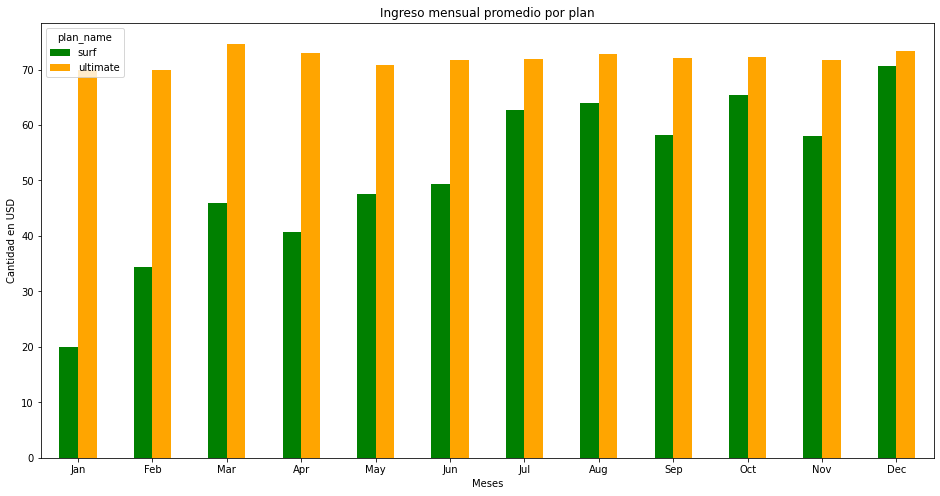

In [71]:
mean_revenue.plot.bar(figsize=(16,8),rot = 0,color=['Green', 'Orange'])


plt.title('Ingreso mensual promedio por plan')
plt.ylabel('Cantidad en USD')
plt.xlabel('Meses')

plt.show()

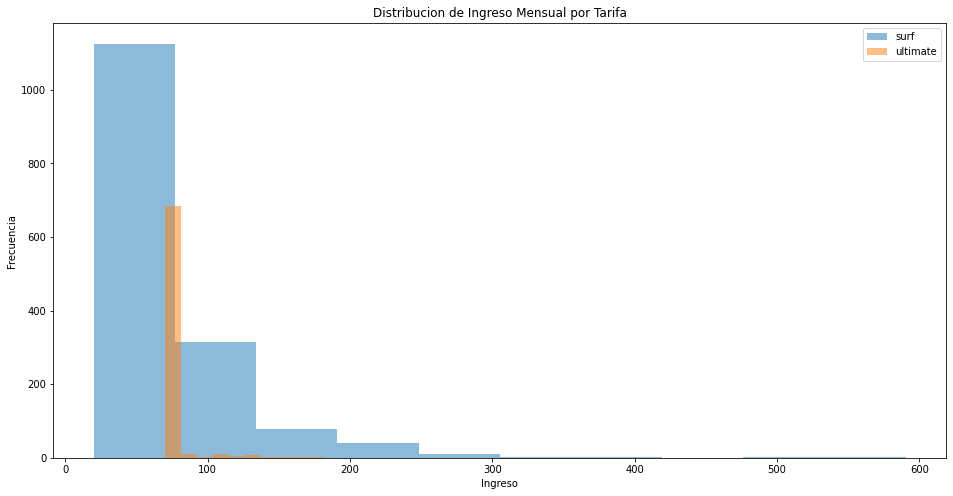

In [72]:
#Histograma para comparar la distribucion de ingreso de las dos tarifas
surf_revenue = usage_table.loc[usage_table['plan'] == 'surf', 'monthly_revenue']
ultimate_revenue = usage_table.loc[usage_table['plan'] == 'ultimate', 'monthly_revenue']

plt.figure(figsize=(16, 8))
plt.hist(surf_revenue, alpha=0.5, label='surf')
plt.hist(ultimate_revenue, alpha=0.5, label='ultimate')


plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Ingreso Mensual por Tarifa')

plt.legend()

plt.show()

In [73]:
# Calcular media y varianza para ingreso mensual por plan
monthly_revenue_stats = usage_table.pivot_table(index='plan_name', values='monthly_revenue', aggfunc=['mean', 'var'])
monthly_revenue_stats.columns = ['mean_monthly_revenue', 'var_monthly_revenue']
monthly_revenue_stats

,mean_monthly_revenue,var_monthly_revenue
plan_name,,
surf,60.706408,3067.835152
ultimate,72.313889,129.848486


In [74]:
surf_user_rev_f =  usage_table[usage_table['plan_name'] == 'surf']
ultimate_user_rev_f =  usage_table[usage_table['plan_name'] == 'ultimate']

surf_user_rev_f['monthly_revenue'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: monthly_revenue, dtype: float64

In [75]:
ultimate_user_rev_f =  usage_table[usage_table['plan_name'] == 'surf']
ultimate_user_rev_f =  usage_table[usage_table['plan_name'] == 'ultimate']

ultimate_user_rev_f['monthly_revenue'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: monthly_revenue, dtype: float64


**Conclusiones Ingresos**

*Los ingresos promedio del plan Ultimate tienden a ser mas altos que los del plan Surf en todos los meses.

*Existe una tendencia general de aumento de los ingresos a lo largo del tiempo para ambos planes, observandose mayores ingresos en el ultimo cuarto del año.

*La varianza en los ingresos mensuales de Surf es significativamente mayor que la de Ultimate, lo que indica que hay mas variabilidad en los ingresos mensuales del plan Surf en comparacion con la tarifa Ultimate.
*El ingreso mensual promedio de los usuarios del plan Surf es de USD 60.71

*El ingreso mensual maximo es de USD 590.37. Esto indica que algunos usuarios del plan Surf pagaron una cantidad mucho mayor, posiblemente debido a cargos adicionales.

*Hay valores atipicos en la distribucion, siendo USD 590.37 el maximo



## Prueba las hipótesis estadísticas

**Hipótesis nula: Los ingresos promedio procedentes de los usarios de los planes de llamada Ultimate y Surf son iguales.**

**Hipótesis alternativa: Los ingresos promedio procedentes de los usarios de los planes de llamada Ultimate y Surf varian.** 

In [76]:
# Ingreso promedio por plan
surf_user_consumption_per_month = usage_table[usage_table['plan_name'] == 'surf']
ultimate_user_consumption_per_month = usage_table[usage_table['plan_name'] == 'ultimate']

surf_mean_user_revenue = surf_user_consumption_per_month.groupby(['plan_name', 'user_id'])['monthly_revenue'].mean()
ultimate_mean_user_revenue = ultimate_user_consumption_per_month.groupby(['plan_name', 'user_id'])['monthly_revenue'].mean()


In [77]:
# Prueba las hipótesis
alpha = 0.05 # significance level

results = st.ttest_ind(surf_mean_user_revenue, ultimate_mean_user_revenue)

display('p-value:', results.pvalue)

if (results.pvalue < alpha):
    display("Rechazamos la hipótesis nula ")
else:
    display("No se puede rechazar la hipótesis nula")

'p-value:'

0.00011355294752235661

'Rechazamos la hipótesis nula '

Podemos rechazar la hipotesis nula que estipula que ingresos promedio procedentes de los usarios de los planes de llamada Ultimate y Surf son iguales. Se puede determinar que hay una difencia significativa entre los ingresos promedio de los planes Surf y Ultimate.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

**Hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.** 


**Hipótesis alternativa: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones**


In [78]:
ny_nj_revenue = usage_table.loc[usage_table["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA", "monthly_revenue"]
other_revenue = usage_table.loc[usage_table["city"] != "NY-NJ", "monthly_revenue"]

In [79]:
# Prueba las hipótesis

alpha = 0.05
results = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Display results
display('p-value:', results.pvalue)
if results.pvalue < alpha:
    display("Rechazamos la hipótesis nula")
else:
    display("No se puede rechazar la hipótesis nula")


'p-value:'

0.07054170477550269

'No se puede rechazar la hipótesis nula'

Debido a que el p-value obtenido es mayor que el nivel de signicancia, por lo que la hipotesis nula no se puede rechazar. Esto quiere decir que el ingreso promedio de los usuarios en el area de NY-NJ es igual al de las otras regiones.

## Conclusión general


*Los clientes del plan Ultimate tienden a tener una duración promedio de llamadas más larga que los del plan Surf.

*Ambos planes muestran una tendencia general de aumento de la duración promedio de las llamadas de enero a diciembre, lo que podría indicar un efecto estacional o una tendencia en el comportamiento de los clientes.

*La distribución de la duración de las llamadas mensuales para los usuarios del plan Surf está sesgada positiva o ligeramente a la derecha. La mayoría de los usuarios del plan Surf (50%) realizan llamadas de menos de 430 minutos al mes, mientras que algunos usuarios realizan llamadas muy largas, hasta un máximo de 1510 minutos al mes.

*Los usuarios del plan Ultimate, en promedio, envían más mensajes que los usuarios del plan Surf.

*En promedio, los usuarios del plan Ultimate consumen más datos de Internet que los usuarios del plan de navegación.

*La diferencia en las medias de los ingresos generados por el surf y los planes finales difieren significativamente.

*Los ingresos medios generados por los usuarios en el área NY-NJ no difieren significativamente de los ingresos medios generados por los usuarios en otras regiones.

